In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

#Capturando os dados da URL contendo as informações do Petrobleo Brent
url = 'http://www.ipeadata.gov.br/ExibeSerie.aspx?module=m&serid=1650971490&oper=view'

#Faz uma requisição ao site e guarda a resposta
response = requests.get(url)

#verifica se a requisição deu certo
if response.status_code == 200:
    #Cria um objeto BeautifulSoup para analisar o HTML
    soup = BeautifulSoup(response.text, 'html.parser')

    #Localiza a tabela no HTML
    table = soup.find('table', {'id': 'grd_DXMainTable'})

    #Com o pandas é feito a leitura do HTML para um dataframe
    df = pd.read_html(str(table), skiprows=0)[0]

    df.columns = df.iloc[0]
    df = df.drop(0)

    #Mostra as primeiras linhas do DataFrame
    df.head()
else:
    print('Falha ao acessar a página: Status Code', response.status_code)



C:\Users\João Pedro\AppData\Local\Temp\ipykernel_17424\193604592.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table), skiprows=0)[0]


In [3]:
df

,Data,Preço - petróleo bruto - Brent (FOB)
1,13/05/2024,8318
2,10/05/2024,8339
3,09/05/2024,8327
4,08/05/2024,8244
5,07/05/2024,8269
...,...,...
11165,26/05/1987,1863
11166,25/05/1987,1860
11167,22/05/1987,1855
11168,21/05/1987,1845


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime

#Função para atualizar o Dataframe com atualização de data
def update_dataframe(df, new_data):
    #converte a coluna Data para Datetime
    df['Data'] = pd.to_datetime(df['Data'],dayfirst=True)
    new_data['Data'] = pd.to_datetime(new_data['Data'],dayfirst=True)

    #Encontra a Data mais recente no Dataframe
    last_date = df['Data'].max()

    #Filtra as novas linhas que são mais recentes que a última data do dataframe
    new_rows = new_data[new_data['Data'] > last_date]

    #Concatena os novos dados com o Dataframe já existente
    if not new_rows.empty:
        updated_df = pd.concat([df,new_rows],ignore_index=True)
    else:
        updated_df = df

    return updated_df

#Capturando os dados da URL contendo as informações do Petrobleo Brent
url = 'http://www.ipeadata.gov.br/ExibeSerie.aspx?module=m&serid=1650971490&oper=view'

#Faz uma requisição ao site e guarda a resposta
response = requests.get(url)

#verifica se a requisição deu certo
if response.status_code == 200:
    #Cria um objeto BeautifulSoup para analisar o HTML
    soup = BeautifulSoup(response.text, 'html.parser')

    #Localiza a tabela no HTML
    table = soup.find('table', {'id': 'grd_DXMainTable'})

    #Com o pandas é feito a leitura do HTML para um dataframe
    new_df = pd.read_html(str(table), header=0)[0]

    #Verifica se o arquivo do Dataframe existe e carrega, ou criaa um novo se não existir
    path = 'data/ipea.csv'

    try:
        existing_df = pd.read_csv(path)
    except FileNotFoundError:
        existing_df = new_df # Se o arquivo não existir, considere os dados atuais como o Dataframe existente
    
    existing_df['Data'] = pd.to_datetime(existing_df['Data'], errors='coerce')
    new_df['Data'] = pd.to_datetime(new_df['Data'],dayfirst=True)

    #Carga incremental de dados no Dataframe
    updated_df = update_dataframe(existing_df, new_df)

    updated_df['Preço - petróleo bruto - Brent (FOB)'] = updated_df['Preço - petróleo bruto - Brent (FOB)']/100

    # Salva o Dataframe atualizado para o arquivo
    updated_df.to_csv(path,index=False)

    #Mostra as primeiras linhas do DataFrame
    updated_df.head()
else:
    print('Falha ao acessar a página: Status Code', response.status_code)


C:\Users\João Pedro\AppData\Local\Temp\ipykernel_17424\1146860886.py:41: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  new_df = pd.read_html(str(table), header=0)[0]
C:\Users\João Pedro\AppData\Local\Temp\ipykernel_17424\1146860886.py:51: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  existing_df['Data'] = pd.to_datetime(existing_df['Data'], errors='coerce')


In [5]:
existing_df.head()

,Data,Preço - petróleo bruto - Brent (FOB)
0,2024-05-13,83.18
1,2024-05-10,83.39
2,2024-05-09,83.27
3,2024-05-08,82.44
4,2024-05-07,82.69


In [6]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11169 entries, 0 to 11168
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Data                                  11169 non-null  datetime64[ns]
 1   Preço - petróleo bruto - Brent (FOB)  11169 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 174.6 KB


Utilizando modelo Gradient Boosting Regressor

<>:8: SyntaxWarning: invalid escape sequence '\i'
<>:8: SyntaxWarning: invalid escape sequence '\i'
C:\Users\João Pedro\AppData\Local\Temp\ipykernel_17424\91341048.py:8: SyntaxWarning: invalid escape sequence '\i'
  df = pd.read_csv('data\ipea.csv')


Mean Squared Error: 2.8109096400878184
Mean Absolute Error: 1.1797287287572056


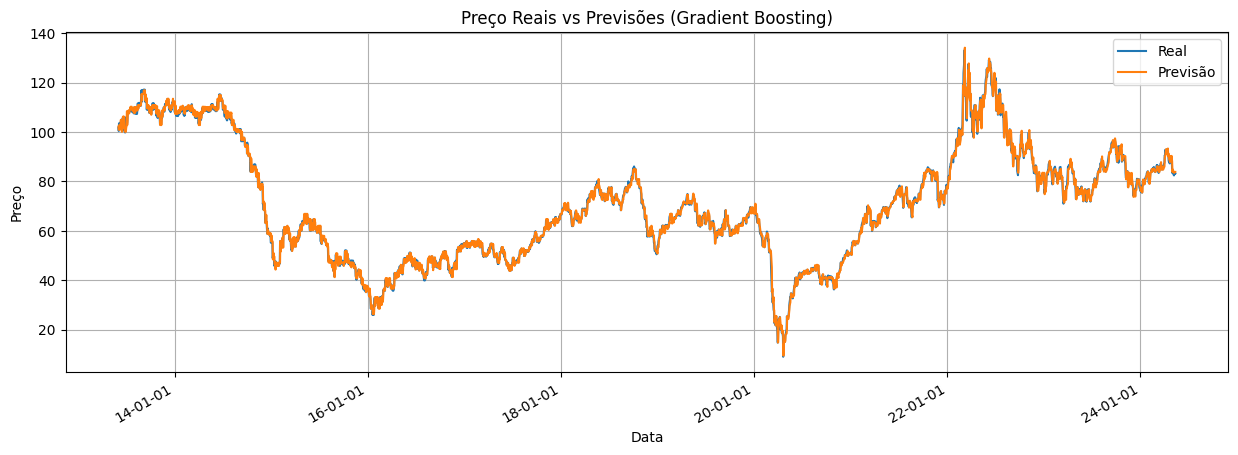

In [7]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

#Carregar o dataframe e alterar datatype de Data
df = pd.read_csv('data\ipea.csv')
df['Data'] = pd.to_datetime(df['Data'])
df = df.sort_values(by='Data', ascending=True).reset_index(drop=True)

#Recuros de Atraso (lag features) para séries temporais
for lag in range(1,2): #Criar atrasos de 1 dia até 3 dias
    df[f'Preço_lag_{lag}'] = df['Preço - petróleo bruto - Brent (FOB)'].shift(lag)

# Remove linhas com valores Nulos
df = df.dropna()

#Preparando os dados pra treinamento
x = df[['Preço_lag_1']].values #Inputs são os preços atrasados
y = df['Preço - petróleo bruto - Brent (FOB)'].values #Output é o preço atual

#Dividir os dados em conjuntos de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=False, random_state=42)

#Criar e treinar o modelo de Gradient Boosting
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, loss='squared_error')
model.fit(x_train,y_train)

#Fazer previsões
predictions = model.predict(x_test)

#Avaliar o modelo
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

#Plotando resultados reais x previstos
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(15,5))
plt.plot(df['Data'].iloc[-len(y_test):], y_test, label='Real')
plt.plot(df['Data'].iloc[-len(predictions):], predictions, label='Previsão')
#Melhorar a formatação do eixo x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))    #Formatar datas como 'Ano-Mes-Dia'
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())   #Escolher automaticamente a localização das datas
#Melhoraar a legibilidade irando as datas e ajustando o espaçamento
plt.gcf().autofmt_xdate()    #Gira as datas para evitar sobreposição
plt.legend()
plt.xlabel('Data')
plt.ylabel('Preço')
plt.grid(True)
plt.title('Preço Reais vs Previsões (Gradient Boosting)')
plt.show()

In [8]:
df.head()

,Data,Preço - petróleo bruto - Brent (FOB),Preço_lag_1
1,1987-05-21,18.45,18.63
2,1987-05-22,18.55,18.45
3,1987-05-25,18.60,18.55
4,1987-05-26,18.63,18.60
5,1987-05-27,18.60,18.63


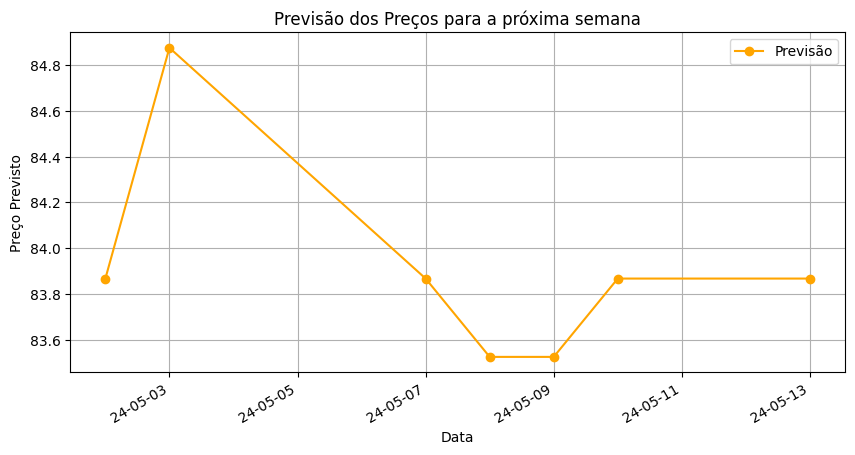

In [9]:
predictions_next_week = predictions[-7:]  #Ajustar o número conforme necessário
df_next_week_dates = df['Data'].iloc[-len(y_test):][-7:]  #Ajustar o número conforme necessário

#Plotar os resultados
plt.figure(figsize=(10,5))
#Certifique-se de reverter os dados para que as datas sejam plotadas em ordem cronológica
plt.plot(df_next_week_dates[::-1], predictions_next_week[::-1], label='Previsão', color='orange', marker='o')

#Formatar o eixo x para apesentar as datas
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))    #Formatar datas como 'Ano-Mes-Dia'
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())   #Escolher automaticamente a localização das datas

#Melhorar a legibilidade irando as datas e ajustando o espaçamento
plt.gcf().autofmt_xdate()    #Gira as datas para evitar sobreposição

plt.legend()
plt.xlabel('Data')
plt.ylabel('Preço Previsto')
plt.grid(True)
plt.title('Previsão dos Preços para a próxima semana')
plt.show()

In [10]:
len(predictions)

3351

In [11]:
x_train

array([[ 18.63],
       [ 18.45],
       [ 18.55],
       ...,
       [101.79],
       [100.43],
       [103.77]])

Modelo Gradient Boosting

Mean Squared Error: 2.9391594382588666
Mean Absolute Error: 1.1867737076042189
2024-05-14 00:00:00: 83.65
2024-05-15 00:00:00: 83.58
2024-05-16 00:00:00: 83.44
2024-05-17 00:00:00: 83.44
2024-05-18 00:00:00: 83.66
2024-05-19 00:00:00: 83.66
2024-05-20 00:00:00: 83.66


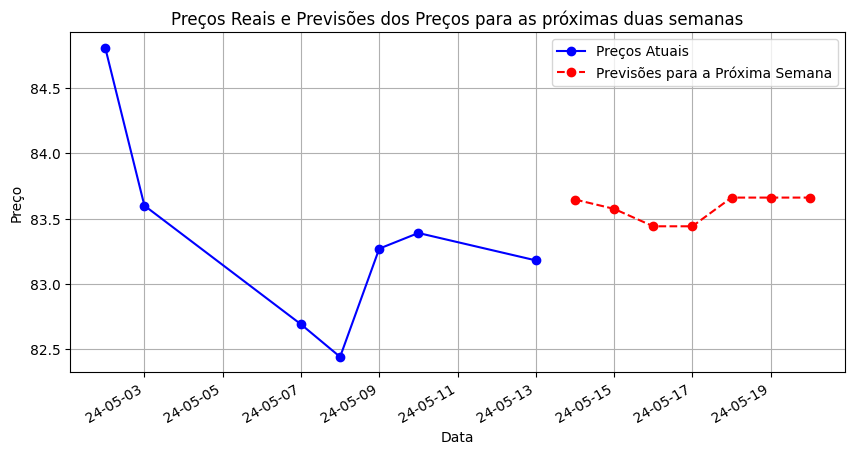

In [12]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

#Carregar o DataFrame
df = pd.read_csv('C:\\Users\\João Pedro\\Desktop\\brent-price\\data\\ipea.csv')
df['Data'] = pd.to_datetime(df['Data'])
df = df.sort_values(by='Data', ascending=True).reset_index(drop=True)

#Recuros de Atraso (lag features) para séries temporais
lags = 7
for lag in range(1,lags+1): #Criar atrasos de 1 dia até 3 dias
    df[f'Preço_lag_{lag}'] = df['Preço - petróleo bruto - Brent (FOB)'].shift(lag)

# Remove linhas com valores NAN
df = df.dropna()

#Preparando os dados pra terinamento
x = df[['Preço_lag_1','Preço_lag_2','Preço_lag_3','Preço_lag_4']].values #Inputs são os preços atrasados
y = df['Preço - petróleo bruto - Brent (FOB)'].values #Output é o preço atual

#Dividir os dados em conjuntos de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=False)

#Criar e treinar o modelo de Gradient Boosting
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, loss='squared_error')
model.fit(x_train,y_train)

#Fazer previsões
predictions = model.predict(x_test)

#Avaliar o modelo
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

#Fazer previsões para a próxima semana usando os últimos dados conhecidos
last_known_data = x[-1].reshape(1,-1)
next_week_predictions = []
for _ in range(7): #para cada dia da próxima semana
    next_day_pred = model.predict(last_known_data)[0]
    next_week_predictions.append(next_day_pred)
    last_known_data = np.roll(last_known_data, -1)
    last_known_data[0, -1] = next_day_pred

#As datas correspondentes a próxima semana
next_week_dates = pd.date_range(df['Data'].iloc[-1], periods=8)[1:]

#Selecionar os dados da semana atual
current_week_dates = df['Data'].iloc[-7:]
current_week_prices = df['Preço - petróleo bruto - Brent (FOB)'].iloc[-7:]

for week, pred in zip(next_week_dates, next_week_predictions):
    print(f'{week}: {pred:.2f}')

#Plotar os preços reais da semana atual e as previsões para a próxima semana
plt.figure(figsize=(10,5))
plt.plot(current_week_dates,current_week_prices, 'bo-', label='Preços Atuais')
plt.plot(next_week_dates,next_week_predictions, 'r--o', label='Previsões para a Próxima Semana')

#Formatar o eixo x para apesentar as datas
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))    #Formatar datas como 'Ano-Mes-Dia'
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())   #Escolher automaticamente a localização das datas

#Melhorar a legibilidade irando as datas e ajustando o espaçamento
plt.gcf().autofmt_xdate()    #Gira as datas para evitar sobreposição

plt.legend()
plt.xlabel('Data')
plt.ylabel('Preço')
plt.grid(True)
plt.title('Preços Reais e Previsões dos Preços para as próximas duas semanas')
plt.show()


Modelo Gradient Boosting - Versão Final

Mean Squared Error: 2.9391594382588666
Mean Absolute Error: 1.1867737076042189
2024-05-14 00:00:00: 83.65
2024-05-15 00:00:00: 83.58
2024-05-16 00:00:00: 83.44
2024-05-17 00:00:00: 83.44
2024-05-18 00:00:00: 83.66
2024-05-19 00:00:00: 83.66
2024-05-20 00:00:00: 83.66


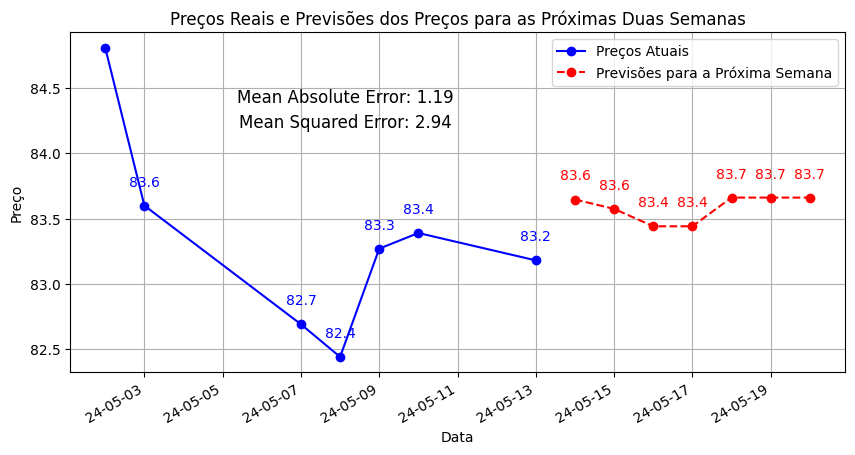

In [13]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

# Carregar o DataFrame
df = pd.read_csv('C:\\Users\\João Pedro\\Desktop\\brent-price\\data\\ipea.csv')
df['Data'] = pd.to_datetime(df['Data'])
df = df.sort_values(by='Data', ascending=True).reset_index(drop=True)

# Recursos de Atraso (lag features) para séries temporais
lags = 7
for lag in range(1, lags + 1):
    df[f'Preço_lag_{lag}'] = df['Preço - petróleo bruto - Brent (FOB)'].shift(lag)

# Remove linhas com valores NAN
df = df.dropna()

# Preparando os dados para treinamento
x = df[['Preço_lag_1', 'Preço_lag_2', 'Preço_lag_3', 'Preço_lag_4']].values  # Inputs são os preços atrasados
y = df['Preço - petróleo bruto - Brent (FOB)'].values  # Output é o preço atual

# Dividir os dados em conjuntos de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=False)

# Criar e treinar o modelo de Gradient Boosting
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, loss='squared_error')
model.fit(x_train, y_train)

# Fazer previsões
predictions = model.predict(x_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

# Fazer previsões para a próxima semana usando os últimos dados conhecidos
last_known_data = x[-1].reshape(1, -1)
next_week_predictions = []
for _ in range(7):  # para cada dia da próxima semana
    next_day_pred = model.predict(last_known_data)[0]
    next_week_predictions.append(next_day_pred)
    last_known_data = np.roll(last_known_data, -1)
    last_known_data[0, -1] = next_day_pred

# As datas correspondentes à próxima semana
next_week_dates = pd.date_range(df['Data'].iloc[-1], periods=8)[1:]

# Selecionar os dados da semana atual
current_week_dates = df['Data'].iloc[-7:]
current_week_prices = df['Preço - petróleo bruto - Brent (FOB)'].iloc[-7:]

for week, pred in zip(next_week_dates, next_week_predictions):
    print(f'{week}: {pred:.2f}')

# Plotar os preços reais da semana atual e as previsões para a próxima semana
plt.figure(figsize=(10, 5))
plt.plot(current_week_dates, current_week_prices, 'bo-', label='Preços Atuais')
plt.plot(next_week_dates, next_week_predictions, 'r--o', label='Previsões para a Próxima Semana')

# Adicionar valores reais e previstos acima dos pontos do gráfico
for i, txt in enumerate(current_week_prices):
    plt.annotate(f'{txt:.1f}', (current_week_dates.iloc[i], current_week_prices.iloc[i] + 0.15), ha='center', color='blue')
for i, txt in enumerate(next_week_predictions):
    plt.annotate(f'{txt:.1f}', (next_week_dates[i], next_week_predictions[i] + 0.15), ha='center', color='red')

# Formatando o eixo x para apresentar as datas
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))  # Formatar datas como 'Ano-Mes-Dia'
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Escolher automaticamente a localização das datas

# Melhorar a legibilidade girando as datas e ajustando o espaçamento
plt.gcf().autofmt_xdate()  # Gira as datas para evitar sobreposição

# Adicionar legendas e título
plt.legend()
plt.xlabel('Data')
plt.ylabel('Preço')
plt.grid(True)
plt.title('Preços Reais e Previsões dos Preços para as Próximas Duas Semanas')

# Adicionar as métricas de erro no topo do gráfico, centralizadas
plt.text(0.4, 0.70, f'Mean Squared Error: {mse:.2f}', ha='center', va='center', transform=plt.gcf().transFigure, fontsize=12)
plt.text(0.4, 0.75, f'Mean Absolute Error: {mae:.2f}', ha='center', va='center', transform=plt.gcf().transFigure, fontsize=12)

plt.show()


In [14]:
#Salvar e Carregar Modelo Gradient
import pickle
import joblib

with open('modelo_brent_GB.pkl', 'wb') as file:
    pickle.dump(model,file)

with open('modelo_brent_GB.pkl', 'rb') as file_2:
    modelo_brent_GB = pickle.load(file_2)

Modelo Random Forest

Mean Squared Error: 3.160793963958383
Mean Absolute Error: 1.263686619461045
2024-05-14 00:00:00: 83.62
2024-05-15 00:00:00: 83.62
2024-05-16 00:00:00: 83.54
2024-05-17 00:00:00: 83.54
2024-05-18 00:00:00: 83.62
2024-05-19 00:00:00: 83.62
2024-05-20 00:00:00: 83.62


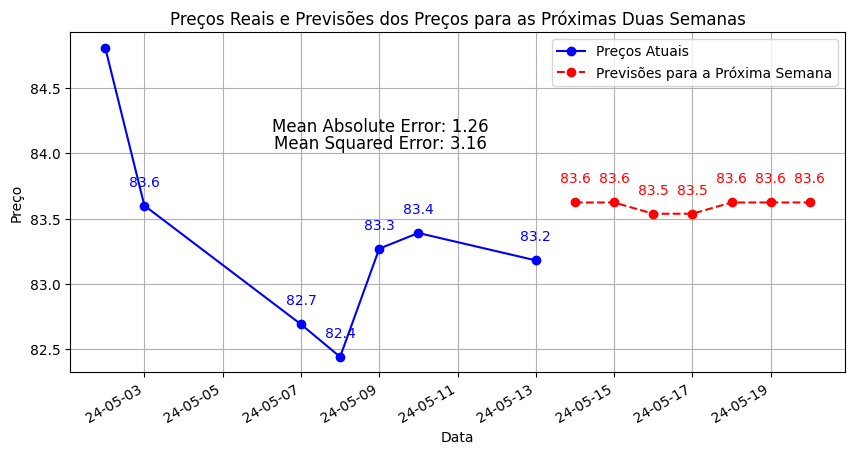

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

# Carregar o DataFrame
df = pd.read_csv('C:\\Users\\João Pedro\\Desktop\\brent-price\\data\\ipea.csv')
df['Data'] = pd.to_datetime(df['Data'])
df = df.sort_values(by='Data', ascending=True).reset_index(drop=True)

# Recursos de Atraso (lag features) para séries temporais
lags = 7
for lag in range(1, lags + 1):
    df[f'Preço_lag_{lag}'] = df['Preço - petróleo bruto - Brent (FOB)'].shift(lag)

# Remove linhas com valores NAN
df = df.dropna()

# Preparando os dados para treinamento
x = df[['Preço_lag_1', 'Preço_lag_2', 'Preço_lag_3', 'Preço_lag_4']].values  # Inputs são os preços atrasados
y = df['Preço - petróleo bruto - Brent (FOB)'].values  # Output é o preço atual

# Dividir os dados em conjuntos de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=False)

# Criar e treinar o modelo de Random Forest
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model.fit(x_train, y_train)

# Fazer previsões
predictions = model.predict(x_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

# Fazer previsões para a próxima semana usando os últimos dados conhecidos
last_known_data = x[-1].reshape(1, -1)
next_week_predictions = []
for _ in range(7):  # para cada dia da próxima semana
    next_day_pred = model.predict(last_known_data)[0]
    next_week_predictions.append(next_day_pred)
    last_known_data = np.roll(last_known_data, -1)
    last_known_data[0, -1] = next_day_pred

# As datas correspondentes à próxima semana
next_week_dates = pd.date_range(df['Data'].iloc[-1], periods=8)[1:]

# Selecionar os dados da semana atual
current_week_dates = df['Data'].iloc[-7:]
current_week_prices = df['Preço - petróleo bruto - Brent (FOB)'].iloc[-7:]

for week, pred in zip(next_week_dates, next_week_predictions):
    print(f'{week}: {pred:.2f}')

# Plotar os preços reais da semana atual e as previsões para a próxima semana
plt.figure(figsize=(10, 5))
plt.plot(current_week_dates, current_week_prices, 'bo-', label='Preços Atuais')
plt.plot(next_week_dates, next_week_predictions, 'r--o', label='Previsões para a Próxima Semana')

# Adicionar valores reais e previstos acima dos pontos do gráfico
for i, txt in enumerate(current_week_prices):
    plt.annotate(f'{txt:.1f}', (current_week_dates.iloc[i], current_week_prices.iloc[i] + 0.15), ha='center', color='blue')
for i, txt in enumerate(next_week_predictions):
    plt.annotate(f'{txt:.1f}', (next_week_dates[i], next_week_predictions[i] + 0.15), ha='center', color='red')

# Formatando o eixo x para apresentar as datas
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))  # Formatar datas como 'Ano-Mes-Dia'
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Escolher automaticamente a localização das datas

# Melhorar a legibilidade girando as datas e ajustando o espaçamento
plt.gcf().autofmt_xdate()  # Gira as datas para evitar sobreposição

# Adicionar legendas e título
plt.legend()
plt.xlabel('Data')
plt.ylabel('Preço')
plt.grid(True)
plt.title('Preços Reais e Previsões dos Preços para as Próximas Duas Semanas')

# Adicionar as métricas de erro no topo do gráfico, centralizadas
plt.text(0.4, 0.70, f'Mean Squared Error: {mse:.2f}', ha='center', va='top', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.4, 0.75, f'Mean Absolute Error: {mae:.2f}', ha='center', va='top', transform=plt.gca().transAxes, fontsize=12)

plt.show()


In [16]:
#Salvar e Carregar Modelo RandomForest
import pickle
import joblib

with open('modelo_brent_RF.pkl', 'wb') as file:
    pickle.dump(model,file)

with open('modelo_brent_RF.pkl', 'rb') as file_2:
    modelo_brent_RF = pickle.load(file_2)

Modelo AdaBoost

Mean Squared Error: 6.417039328332128
Mean Absolute Error: 2.0105136970928235
2024-05-14 00:00:00: 81.23
2024-05-15 00:00:00: 81.23
2024-05-16 00:00:00: 81.08
2024-05-17 00:00:00: 80.93
2024-05-18 00:00:00: 78.74
2024-05-19 00:00:00: 78.74
2024-05-20 00:00:00: 78.74


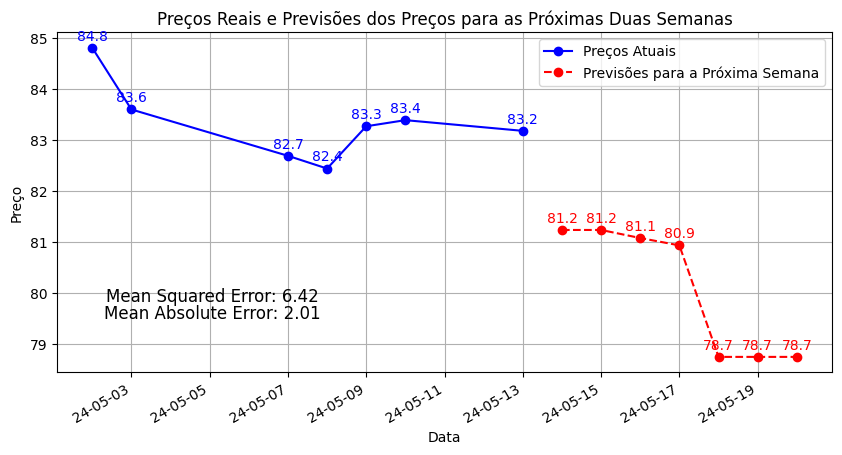

In [17]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

# Carregar o DataFrame
df = pd.read_csv('C:\\Users\\João Pedro\\Desktop\\brent-price\\data\\ipea.csv')
df['Data'] = pd.to_datetime(df['Data'])
df = df.sort_values(by='Data', ascending=True).reset_index(drop=True)

# Recursos de Atraso (lag features) para séries temporais
lags = 7
for lag in range(1, lags + 1):
    df[f'Preço_lag_{lag}'] = df['Preço - petróleo bruto - Brent (FOB)'].shift(lag)

# Remove linhas com valores NAN
df = df.dropna()

# Preparando os dados para treinamento
x = df[['Preço_lag_1', 'Preço_lag_2', 'Preço_lag_3', 'Preço_lag_4']].values  # Inputs são os preços atrasados
y = df['Preço - petróleo bruto - Brent (FOB)'].values  # Output é o preço atual

# Dividir os dados em conjuntos de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=False)

# Criar e treinar o modelo de AdaBoost
model = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(x_train, y_train)

# Fazer previsões
predictions = model.predict(x_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

# Fazer previsões para a próxima semana usando os últimos dados conhecidos
last_known_data = x[-1].reshape(1, -1)
next_week_predictions = []
for _ in range(7):  # para cada dia da próxima semana
    next_day_pred = model.predict(last_known_data)[0]
    next_week_predictions.append(next_day_pred)
    last_known_data = np.roll(last_known_data, -1)
    last_known_data[0, -1] = next_day_pred

# As datas correspondentes à próxima semana
next_week_dates = pd.date_range(df['Data'].iloc[-1], periods=8)[1:]

# Selecionar os dados da semana atual
current_week_dates = df['Data'].iloc[-7:]
current_week_prices = df['Preço - petróleo bruto - Brent (FOB)'].iloc[-7:]

for week, pred in zip(next_week_dates, next_week_predictions):
    print(f'{week}: {pred:.2f}')

# Plotar os preços reais da semana atual e as previsões para a próxima semana
plt.figure(figsize=(10, 5))
plt.plot(current_week_dates, current_week_prices, 'bo-', label='Preços Atuais')
plt.plot(next_week_dates, next_week_predictions, 'r--o', label='Previsões para a Próxima Semana')

# Adicionar valores reais e previstos acima dos pontos do gráfico
for i, txt in enumerate(current_week_prices):
    plt.annotate(f'{txt:.1f}', (current_week_dates.iloc[i], current_week_prices.iloc[i] + 0.15), ha='center', color='blue')
for i, txt in enumerate(next_week_predictions):
    plt.annotate(f'{txt:.1f}', (next_week_dates[i], next_week_predictions[i] + 0.15), ha='center', color='red')

# Formatando o eixo x para apresentar as datas
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))  # Formatar datas como 'Ano-Mes-Dia'
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Escolher automaticamente a localização das datas

# Melhorar a legibilidade girando as datas e ajustando o espaçamento
plt.gcf().autofmt_xdate()  # Gira as datas para evitar sobreposição

# Adicionar legendas e título
plt.legend()
plt.xlabel('Data')
plt.ylabel('Preço')
plt.grid(True)
plt.title('Preços Reais e Previsões dos Preços para as Próximas Duas Semanas')

# Adicionar as métricas de erro no topo do gráfico, centralizadas
plt.text(0.2, 0.25, f'Mean Squared Error: {mse:.2f}', ha='center', va='top', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.2, 0.20, f'Mean Absolute Error: {mae:.2f}', ha='center', va='top', transform=plt.gca().transAxes, fontsize=12)

plt.show()


In [18]:
#Salvar e Carregar Modelo AdaBoost
import pickle
import joblib

with open('modelo_brent_AB.pkl', 'wb') as file:
    pickle.dump(model,file)

with open('modelo_brent_AB.pkl', 'rb') as file_2:
    modelo_brent_AB = pickle.load(file_2)

Modelo XGBoost

Mean Squared Error: 2.9953455604979515
Mean Absolute Error: 1.2022481582313553
2024-05-14 00:00:00: 83.93
2024-05-15 00:00:00: 83.28
2024-05-16 00:00:00: 83.28
2024-05-17 00:00:00: 83.27
2024-05-18 00:00:00: 83.93
2024-05-19 00:00:00: 83.28
2024-05-20 00:00:00: 83.28


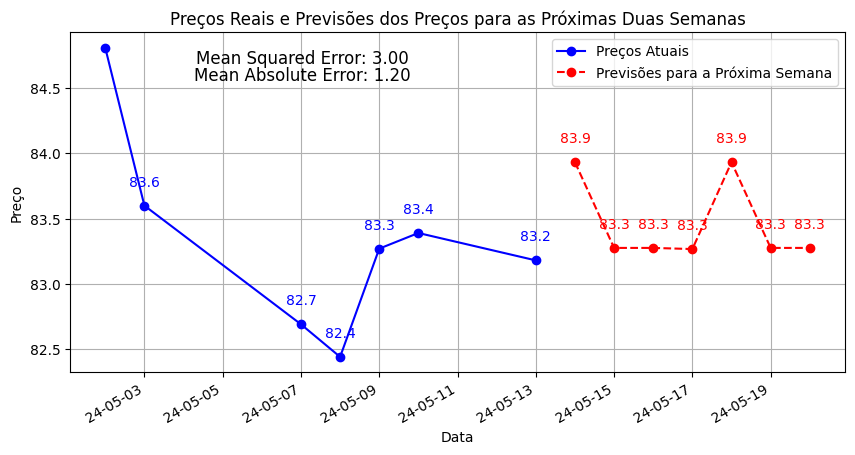

In [19]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Carregar o DataFrame
df = pd.read_csv('C:\\Users\\João Pedro\\Desktop\\brent-price\\data\\ipea.csv')
df['Data'] = pd.to_datetime(df['Data'])
df = df.sort_values(by='Data', ascending=True).reset_index(drop=True)

# Recursos de Atraso (lag features) para séries temporais
lags = 7
for lag in range(1, lags + 1):
    df[f'Preço_lag_{lag}'] = df['Preço - petróleo bruto - Brent (FOB)'].shift(lag)

# Remove linhas com valores NAN
df = df.dropna()

# Preparando os dados para treinamento
x = df[['Preço_lag_1', 'Preço_lag_2', 'Preço_lag_3', 'Preço_lag_4']].values  # Inputs são os preços atrasados
y = df['Preço - petróleo bruto - Brent (FOB)'].values  # Output é o preço atual

# Dividir os dados em conjuntos de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=False)

# Criar e treinar o modelo de XGBoost
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, objective='reg:squarederror')
model.fit(x_train, y_train)

# Fazer previsões
predictions = model.predict(x_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

# Fazer previsões para a próxima semana usando os últimos dados conhecidos
last_known_data = x[-1].reshape(1, -1)
next_week_predictions = []
for _ in range(7):  # para cada dia da próxima semana
    next_day_pred = model.predict(last_known_data)[0]
    next_week_predictions.append(next_day_pred)
    last_known_data = np.roll(last_known_data, -1)
    last_known_data[0, -1] = next_day_pred

# As datas correspondentes à próxima semana
next_week_dates = pd.date_range(df['Data'].iloc[-1], periods=8)[1:]

# Selecionar os dados da semana atual
current_week_dates = df['Data'].iloc[-7:]
current_week_prices = df['Preço - petróleo bruto - Brent (FOB)'].iloc[-7:]

for week, pred in zip(next_week_dates, next_week_predictions):
    print(f'{week}: {pred:.2f}')

# Plotar os preços reais da semana atual e as previsões para a próxima semana
plt.figure(figsize=(10, 5))
plt.plot(current_week_dates, current_week_prices, 'bo-', label='Preços Atuais')
plt.plot(next_week_dates, next_week_predictions, 'r--o', label='Previsões para a Próxima Semana')

# Adicionar valores reais e previstos acima dos pontos do gráfico
for i, txt in enumerate(current_week_prices):
    plt.annotate(f'{txt:.1f}', (current_week_dates.iloc[i], current_week_prices.iloc[i] + 0.15), ha='center', color='blue')
for i, txt in enumerate(next_week_predictions):
    plt.annotate(f'{txt:.1f}', (next_week_dates[i], next_week_predictions[i] + 0.15), ha='center', color='red')

# Formatando o eixo x para apresentar as datas
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))  # Formatar datas como 'Ano-Mes-Dia'
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Escolher automaticamente a localização das datas

# Melhorar a legibilidade girando as datas e ajustando o espaçamento
plt.gcf().autofmt_xdate()  # Gira as datas para evitar sobreposição

# Adicionar legendas e título
plt.legend()
plt.xlabel('Data')
plt.ylabel('Preço')
plt.grid(True)
plt.title('Preços Reais e Previsões dos Preços para as Próximas Duas Semanas')

# Adicionar as métricas de erro no topo do gráfico, centralizadas
plt.text(0.3, 0.95, f'Mean Squared Error: {mse:.2f}', ha='center', va='top', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.3, 0.90, f'Mean Absolute Error: {mae:.2f}', ha='center', va='top', transform=plt.gca().transAxes, fontsize=12)

plt.show()


In [20]:
#Salvar e Carregar Modelo XGBoost
import pickle
import joblib

with open('modelo_brent_XG.pkl', 'wb') as file:
    pickle.dump(model,file)

with open('modelo_brent_XG.pkl', 'rb') as file_2:
    modelo_brent_XG = pickle.load(file_2)

Modelo LightGBM

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 7813, number of used features: 4
[LightGBM] [Info] Start training from score 45.654475
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

c:\Users\João Pedro\Desktop\brent-price\venv\Lib\site-packages\lightgbm\basic.py:696: UserWarning: Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
  _log_warning("Usage of np.ndarray subset (sliced data) is not recommended "


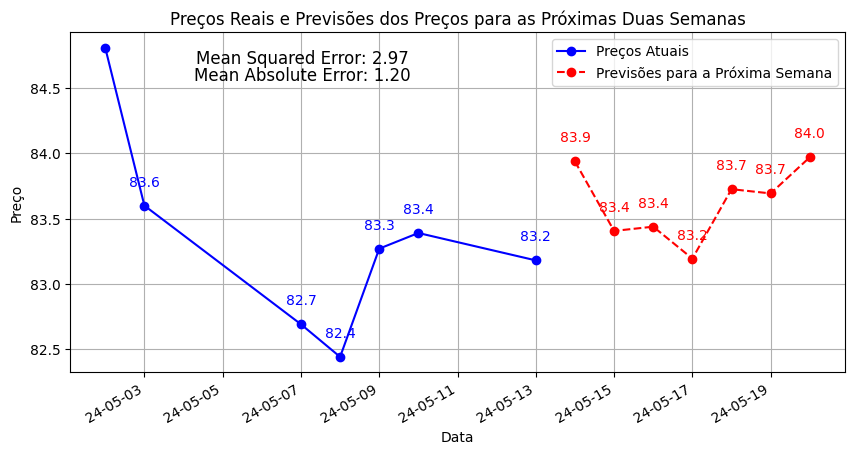

In [21]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Carregar o DataFrame
df = pd.read_csv('C:\\Users\\João Pedro\\Desktop\\brent-price\\data\\ipea.csv')
df['Data'] = pd.to_datetime(df['Data'])
df = df.sort_values(by='Data', ascending=True).reset_index(drop=True)

# Recursos de Atraso (lag features) para séries temporais
lags = 7
for lag in range(1, lags + 1):
    df[f'Preço_lag_{lag}'] = df['Preço - petróleo bruto - Brent (FOB)'].shift(lag)

# Remove linhas com valores NAN
df = df.dropna()

# Preparando os dados para treinamento
x = df[['Preço_lag_1', 'Preço_lag_2', 'Preço_lag_3', 'Preço_lag_4']].values  # Inputs são os preços atrasados
y = df['Preço - petróleo bruto - Brent (FOB)'].values  # Output é o preço atual

# Dividir os dados em conjuntos de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=False)

# Criar e treinar o modelo de LightGBM
model = LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(x_train, y_train)

# Fazer previsões
predictions = model.predict(x_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

# Fazer previsões para a próxima semana usando os últimos dados conhecidos
last_known_data = x[-1].reshape(1, -1)
next_week_predictions = []
for _ in range(7):  # para cada dia da próxima semana
    next_day_pred = model.predict(last_known_data)[0]
    next_week_predictions.append(next_day_pred)
    last_known_data = np.roll(last_known_data, -1)
    last_known_data[0, -1] = next_day_pred

# As datas correspondentes à próxima semana
next_week_dates = pd.date_range(df['Data'].iloc[-1], periods=8)[1:]

# Selecionar os dados da semana atual
current_week_dates = df['Data'].iloc[-7:]
current_week_prices = df['Preço - petróleo bruto - Brent (FOB)'].iloc[-7:]

for week, pred in zip(next_week_dates, next_week_predictions):
    print(f'{week}: {pred:.2f}')

# Plotar os preços reais da semana atual e as previsões para a próxima semana
plt.figure(figsize=(10, 5))
plt.plot(current_week_dates, current_week_prices, 'bo-', label='Preços Atuais')
plt.plot(next_week_dates, next_week_predictions, 'r--o', label='Previsões para a Próxima Semana')

# Adicionar valores reais e previstos acima dos pontos do gráfico
for i, txt in enumerate(current_week_prices):
    plt.annotate(f'{txt:.1f}', (current_week_dates.iloc[i], current_week_prices.iloc[i] + 0.15), ha='center', color='blue')
for i, txt in enumerate(next_week_predictions):
    plt.annotate(f'{txt:.1f}', (next_week_dates[i], next_week_predictions[i] + 0.15), ha='center', color='red')

# Formatando o eixo x para apresentar as datas
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))  # Formatar datas como 'Ano-Mes-Dia'
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Escolher automaticamente a localização das datas

# Melhorar a legibilidade girando as datas e ajustando o espaçamento
plt.gcf().autofmt_xdate()  # Gira as datas para evitar sobreposição

# Adicionar legendas e título
plt.legend()
plt.xlabel('Data')
plt.ylabel('Preço')
plt.grid(True)
plt.title('Preços Reais e Previsões dos Preços para as Próximas Duas Semanas')

# Adicionar as métricas de erro no topo do gráfico, centralizadas
plt.text(0.3, 0.95, f'Mean Squared Error: {mse:.2f}', ha='center', va='top', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.3, 0.90, f'Mean Absolute Error: {mae:.2f}', ha='center', va='top', transform=plt.gca().transAxes, fontsize=12)

plt.show()


In [22]:
#Salvar e Carregar Modelo LightGBM
import pickle
import joblib

with open('modelo_brent_LG.pkl', 'wb') as file:
    pickle.dump(model,file)

with open('modelo_brent_LG.pkl', 'rb') as file_2:
    modelo_brent_LG = pickle.load(file_2)

Modelo CatBoost

Mean Squared Error: 4.170396276662407
Mean Absolute Error: 1.4792656091011787
2024-05-14 00:00:00: 82.89
2024-05-15 00:00:00: 82.89
2024-05-16 00:00:00: 82.89
2024-05-17 00:00:00: 82.89
2024-05-18 00:00:00: 82.89
2024-05-19 00:00:00: 82.89
2024-05-20 00:00:00: 82.89


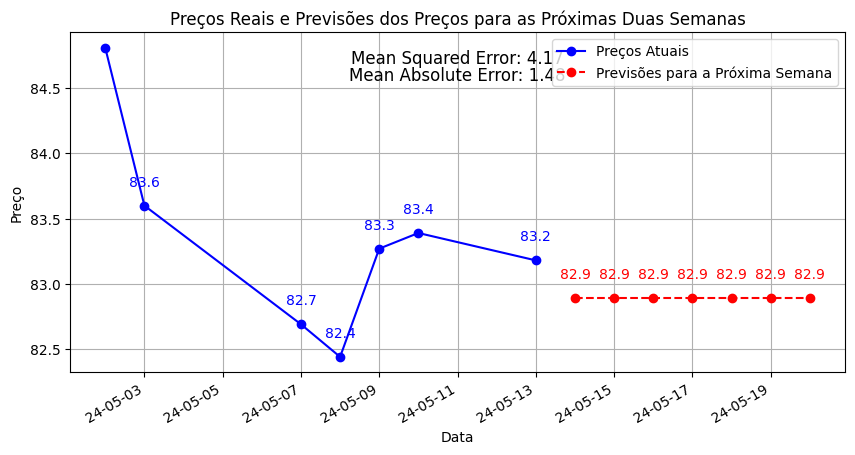

In [23]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Carregar o DataFrame
df = pd.read_csv('C:\\Users\\João Pedro\\Desktop\\brent-price\\data\\ipea.csv')
df['Data'] = pd.to_datetime(df['Data'])
df = df.sort_values(by='Data', ascending=True).reset_index(drop=True)

# Recursos de Atraso (lag features) para séries temporais
lags = 7
for lag in range(1, lags + 1):
    df[f'Preço_lag_{lag}'] = df['Preço - petróleo bruto - Brent (FOB)'].shift(lag)

# Remove linhas com valores NAN
df = df.dropna()

# Preparando os dados para treinamento
x = df[['Preço_lag_1', 'Preço_lag_2', 'Preço_lag_3', 'Preço_lag_4']].values  # Inputs são os preços atrasados
y = df['Preço - petróleo bruto - Brent (FOB)'].values  # Output é o preço atual

# Dividir os dados em conjuntos de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=False)

# Criar e treinar o modelo de CatBoost
model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=5, random_state=42, verbose=0)
model.fit(x_train, y_train)

# Fazer previsões
predictions = model.predict(x_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

# Fazer previsões para a próxima semana usando os últimos dados conhecidos
last_known_data = x[-1].reshape(1, -1)
next_week_predictions = []
for _ in range(7):  # para cada dia da próxima semana
    next_day_pred = model.predict(last_known_data)[0]
    next_week_predictions.append(next_day_pred)
    last_known_data = np.roll(last_known_data, -1)
    last_known_data[0, -1] = next_day_pred

# As datas correspondentes à próxima semana
next_week_dates = pd.date_range(df['Data'].iloc[-1], periods=8)[1:]

# Selecionar os dados da semana atual
current_week_dates = df['Data'].iloc[-7:]
current_week_prices = df['Preço - petróleo bruto - Brent (FOB)'].iloc[-7:]

for week, pred in zip(next_week_dates, next_week_predictions):
    print(f'{week}: {pred:.2f}')

# Plotar os preços reais da semana atual e as previsões para a próxima semana
plt.figure(figsize=(10, 5))
plt.plot(current_week_dates, current_week_prices, 'bo-', label='Preços Atuais')
plt.plot(next_week_dates, next_week_predictions, 'r--o', label='Previsões para a Próxima Semana')

# Adicionar valores reais e previstos acima dos pontos do gráfico
for i, txt in enumerate(current_week_prices):
    plt.annotate(f'{txt:.1f}', (current_week_dates.iloc[i], current_week_prices.iloc[i] + 0.15), ha='center', color='blue')
for i, txt in enumerate(next_week_predictions):
    plt.annotate(f'{txt:.1f}', (next_week_dates[i], next_week_predictions[i] + 0.15), ha='center', color='red')

# Formatando o eixo x para apresentar as datas
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))  # Formatar datas como 'Ano-Mes-Dia'
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Escolher automaticamente a localização das datas

# Melhorar a legibilidade girando as datas e ajustando o espaçamento
plt.gcf().autofmt_xdate()  # Gira as datas para evitar sobreposição

# Adicionar legendas e título
plt.legend()
plt.xlabel('Data')
plt.ylabel('Preço')
plt.grid(True)
plt.title('Preços Reais e Previsões dos Preços para as Próximas Duas Semanas')

# Adicionar as métricas de erro no topo do gráfico, centralizadas
plt.text(0.5, 0.95, f'Mean Squared Error: {mse:.2f}', ha='center', va='top', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.5, 0.90, f'Mean Absolute Error: {mae:.2f}', ha='center', va='top', transform=plt.gca().transAxes, fontsize=12)

plt.show()


In [24]:
#Salvar e Carregar Modelo CatBoost
import pickle
import joblib

with open('modelo_brent_CB.pkl', 'wb') as file:
    pickle.dump(model,file)

with open('modelo_brent_CB.pkl', 'rb') as file_2:
    modelo_brent_CB = pickle.load(file_2)

In [25]:
df

,Data,Preço - petróleo bruto - Brent (FOB),Preço_lag_1,Preço_lag_2,Preço_lag_3,Preço_lag_4,Preço_lag_5,Preço_lag_6,Preço_lag_7
7,1987-05-29,18.58,18.60,18.60,18.63,18.60,18.55,18.45,18.63
8,1987-06-01,18.65,18.58,18.60,18.60,18.63,18.60,18.55,18.45
9,1987-06-02,18.68,18.65,18.58,18.60,18.60,18.63,18.60,18.55
10,1987-06-03,18.75,18.68,18.65,18.58,18.60,18.60,18.63,18.60
11,1987-06-04,18.78,18.75,18.68,18.65,18.58,18.60,18.60,18.63
...,...,...,...,...,...,...,...,...,...
11164,2024-05-07,82.69,83.60,84.81,83.55,88.23,88.44,89.95,88.10
11165,2024-05-08,82.44,82.69,83.60,84.81,83.55,88.23,88.44,89.95
11166,2024-05-09,83.27,82.44,82.69,83.60,84.81,83.55,88.23,88.44
11167,2024-05-10,83.39,83.27,82.44,82.69,83.60,84.81,83.55,88.23
